## Metric

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import sys

sys.path.append('../bd_config')    
from db_query import get_data

In [7]:
df = get_data()

Conexión exitosa a la base de datos
Datos obtenidos exitosamente


In [8]:
df.head()

,id,year,social_support,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_africa,continent_america,continent_asia,continent_europe,continent_oceania,happiness_score,predicted_happiness_score
0,1,2017,1.436338,1.416915,0.913476,0.505626,0.120573,0.163761,False,False,True,False,False,5.920,6.30629
1,2,2019,0.757000,0.274000,0.505000,0.142000,0.275000,0.078000,True,False,False,False,False,3.973,4.03493
2,3,2019,0.560000,0.191000,0.495000,0.443000,0.218000,0.089000,True,False,False,False,False,3.410,4.14127
3,4,2017,1.548969,0.786441,0.498273,0.658249,0.415984,0.246528,False,False,True,False,False,5.971,5.40629
4,5,2015,1.248230,1.053510,0.787230,0.449740,0.114510,0.084840,False,True,False,False,False,6.574,6.62809


In [9]:
y_test = df['happiness_score']
y_pred = df['predicted_happiness_score']

##### Coefficient of determination (R²)

In [10]:
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Coefficient of determination (R^2): 0.8709180118227431


As we can see, the model presents a rather high coefficient of determination, this means, that 87% of the variability in the Happiness Score is explained by the model.

##### Mean Squared Error

In [11]:
mse_rf = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.17818718986973522


A MSE of 0.1781 indicates that, on average, the model predictions differ from the actual value by 0.1781 squared units. A lower MSE means that the model has less squared error, implying that it is closer to accurately predicting the actual values. So, an MSE of 0.1781 suggests that the model is relatively close to accurate predictions.

##### Mean Absolute Error

In [12]:
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MAE):", mae_rf)

Random Forest Regression Model Results:
Mean Squared Error (MAE): 0.3316266288207001


A MAE of 0.3316 shows that, on average, the predictions deviate from the actual value by 0.3316 units. The MAE is the measure of the average of the absolute differences between model predictions and actual values. This metric is less sensitive to extreme values compared to the MSE, as it does not square the errors.

We can see that the MAE is larger than the MSE, this could mean that there are some predictions that are significantly far from the true value (larger errors) and contribute to a larger MAE, however, in general, most of the predictions are quite accurate and have smaller deviations, which reduces the MSE.

This can be confirmed through the following graph:

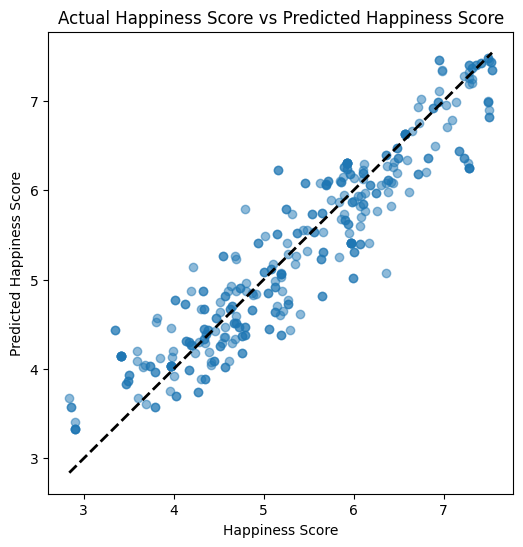

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual Happiness Score vs Predicted Happiness Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  #tto graph the black dashed line

plt.show()